# Exploratory Data Analysis Untuk Membantu Pengambilan Keputusan Wilayah Bekerja Di Jawa Barat Menggunakan Dataset Pengeluaran per Kapita, UMK, Jumlah Penduduk Bekerja, Dan Garis Kemiskinan

### Tanggal Pembuatan Awal : 24 September 2023
### Tanggal Perbaikan : 1 Oktober 2023

# Kelompok 3
1. Boy Aditya Rohmaulana (2203488)
2. Defrizal Yahdiyan Risyad (2206131)
3. Muhamad Furqon Al-Haqqi (2207207)
4. Raya Cahya Nurani (2205714)
5. Septiani Eka Putri (2206000)

# Pendahuluan
Sebagai seseorang yang baru atau akan memasuki dunia kerja, kita sering kali dihadapkan pada banyak pertanyaan yang membingungkan, seperti di mana kita sebaiknya bekerja, berapa gaji yang akan kita terima, dan apakah pendapatan tersebut akan mencukupi untuk kehidupan sehari-hari. Untuk membantu pekerja dalam membuat keputusan yang lebih baik, analisis ini menggunakan data dari Badan Pusat Statistik (BPS) dan Dinas Tenaga Kerja dan Transmigrasi untuk mengevaluasi pilihan tempat kerja berdasarkan faktor-faktor seperti pendapatan dan pengeluaran. Dalam konteks persaingan yang sangat ketat di dunia kerja, perencanaan yang baik sangat penting bagi pekerja agar mereka dapat merencanakan masa depan mereka dengan bijak berdasarkan pilihan yang mereka buat.

# Pertanyaan


1.   Kabupaten/Kota di Provinsi Jawa Barat dengan Upah Minimum 5 tertinggi dan 5 terendah di tahun 2023
2.   Bagaimana tren Upah Minimum Kabupaten/Kota selama beberapa tahun terakhir?
3.   Bagaimana korelasi antara pengeluaran per kapita, upah minimum, jumlah penduduk yang bekerja, dan angka garis kemiskinan per kapita?
4.   Bagaimana persebaran data dari pengeluaran per kapita, upah minimum, jumlah penduduk yang bekerja, dan angka garis kemiskinan per kapita?



# Import Libraries dan Dataset

* **bps-od_17106_jml_pengeluaran_per_kapita__kabupatenkota_data.csv:** dataset Pengeluaran Per Kapita Per Tahun dengan disagregasi Kabupaten/Kota dan Tahun.
  
* **disnakertrans-od_19868_daftar_upah_minimum_kabupatenkota_di_drh_prov_jabar_data.csv:** dataset Upah Minimum dengan dengan disagregasi Kabupaten/Kota dan Tahun.


* **disnakertrans-od_15793_jumlah_penduduk_yang_bekerja_berdasarkan_kabupatenkota_data.csv:** dataset Jumlah Penduduk yang Bekerja dengan disagregasi Kabupaten/Kota dan Tahun.


* **bps-od_17110_angka_garis_kemiskinan_per_kapita_per_bulan__kabupaten_data.csv:** dataset Angka Garis Kemiskinan Per Kapita Per Bulan dengan disagregasi Kabupaten/Kota dan Tahun.

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.3f}'.format

ppk = pd.read_csv("bps-od_17106_jml_pengeluaran_per_kapita__kabupatenkota_data.csv")
um = pd.read_csv("disnakertrans-od_19868_daftar_upah_minimum_kabupatenkota_di_drh_prov_jabar_data.csv")
jpb = pd.read_csv("disnakertrans-od_15793_jumlah_penduduk_yang_bekerja_berdasarkan_kabupatenkota_data.csv")
gk = pd.read_csv("bps-od_17110_angka_garis_kemiskinan_per_kapita_per_bulan__kabupaten_data.csv")

# Data Exploration

**Mengeksplorasi dataset upah minimum**

In [174]:
um.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    189 non-null    int64  
 1   kode_provinsi         189 non-null    int64  
 2   nama_provinsi         189 non-null    object 
 3   kode_kabupaten_kota   189 non-null    int64  
 4   nama_kabupaten_kota   189 non-null    object 
 5   besaran_upah_minimum  189 non-null    float64
 6   satuan                189 non-null    object 
 7   tahun                 189 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 11.9+ KB


In [175]:
# 5 baris pertama dataframe upah minimum
um.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,besaran_upah_minimum,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3204551.000,RUPIAH,2017
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,2376558.390,RUPIAH,2017
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,1989115.000,RUPIAH,2017
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,2463461.490,RUPIAH,2017
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,1538909.000,RUPIAH,2017


In [176]:
# menghapus kolom yang tidak diperlukan
um = um.drop(columns = ["kode_provinsi", "nama_provinsi"])

In [177]:
# mengecek data NaN pada dataframe upah mnimum
um.isna().sum()

id                      0
kode_kabupaten_kota     0
nama_kabupaten_kota     0
besaran_upah_minimum    0
satuan                  0
tahun                   0
dtype: int64

In [178]:
# mengecek data zero values pada dataframe upah mnimum
(um['besaran_upah_minimum'] == 0).sum()

0

**Mengeksplorasi dataset pengeluaran per kapita**

In [179]:
ppk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             348 non-null    int64  
 1   kode_provinsi                  348 non-null    int64  
 2   nama_provinsi                  348 non-null    object 
 3   kode_kabupaten_kota            348 non-null    int64  
 4   nama_kabupaten_kota            348 non-null    object 
 5   jumlah_pengeluaran_per_kapita  348 non-null    float64
 6   satuan                         348 non-null    object 
 7   tahun                          348 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 21.9+ KB


In [180]:
# 5 baris pertama dataframe pengeluaran per kapita
ppk.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_pengeluaran_per_kapita,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,8951.960,RIBU RUPIAH,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,7658.570,RIBU RUPIAH,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,6430.920,RIBU RUPIAH,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,8740.070,RIBU RUPIAH,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,6149.570,RIBU RUPIAH,2010


In [181]:
# menghapus kolom yang tidak diperlukan
ppk = ppk.drop(columns = ["kode_provinsi", "nama_provinsi"])

In [182]:
# mengecek data zero values pada dataframe pengeluaran per kapita
(ppk['jumlah_pengeluaran_per_kapita'] == 0).sum()

0

In [183]:
# mengecek data NaN pada pengeluaran per kapita
ppk.isna().sum()

id                               0
kode_kabupaten_kota              0
nama_kabupaten_kota              0
jumlah_pengeluaran_per_kapita    0
satuan                           0
tahun                            0
dtype: int64

**Mengeksplorasi dataset jumlah penduduk bekerja**

In [184]:
jpb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   293 non-null    int64 
 1   kode_provinsi        293 non-null    int64 
 2   nama_provinsi        293 non-null    object
 3   kode_kabupaten_kota  293 non-null    int64 
 4   nama_kabupaten_kota  293 non-null    object
 5   jumlah_penduduk      293 non-null    int64 
 6   satuan               293 non-null    object
 7   tahun                293 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.4+ KB


In [185]:
# 5 baris pertama dataframe jumlah penduduk bekerja
jpb.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,1852165,ORANG,2011
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,925205,ORANG,2011
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,863044,ORANG,2011
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,1248267,ORANG,2011
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,904607,ORANG,2011


In [186]:
# menghapus kolom yang tidak diperlukan
jpb = jpb.drop(columns = ["kode_provinsi", "nama_provinsi"])

In [187]:
# mengganti nama kolom jumlah_penduduk menjadi jumlah_penduduk_bekerja
jpb.rename(columns = {'jumlah_penduduk':'jumlah_penduduk_bekerja'}, inplace = True)

In [188]:
# mengecek data NaN pada jumlah penduduk bekerja
jpb.isna().sum()

id                         0
kode_kabupaten_kota        0
nama_kabupaten_kota        0
jumlah_penduduk_bekerja    0
satuan                     0
tahun                      0
dtype: int64

In [189]:
# mengecek data zero values pada dataframe jumlah penduduk bekerja
jpb.loc[jpb['jumlah_penduduk_bekerja'] == 0]

,id,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk_bekerja,satuan,tahun
71,72,3273,KOTA BANDUNG,0,ORANG,2013


In [190]:
# mengisi data yang zero value dengan rata-rata
mean = jpb['jumlah_penduduk_bekerja'].loc[jpb['nama_kabupaten_kota'] == 'KOTA BANDUNG'].mean()
jpb['jumlah_penduduk_bekerja'] = jpb['jumlah_penduduk_bekerja'].replace(0, mean)
print(mean)
jpb.loc[jpb['id'] == 72]

1028965.2727272727


,id,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk_bekerja,satuan,tahun
71,72,3273,KOTA BANDUNG,1028965.273,ORANG,2013


**Mengeksplorasi dataset garis kemiskinan**

In [191]:
gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          81 non-null     int64 
 1   kode_provinsi               81 non-null     int64 
 2   nama_provinsi               81 non-null     object
 3   kode_kabupaten_kota         81 non-null     int64 
 4   nama_kabupaten_kota         81 non-null     object
 5   garis_kemiskinan_perkapita  81 non-null     int64 
 6   satuan                      81 non-null     object
 7   tahun                       81 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 5.2+ KB


In [192]:
# 5 baris pertama dataframe garis kemiskinan per kapita
gk.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,garis_kemiskinan_perkapita,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,359787,RUPIAH,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,302213,RUPIAH,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,340882,RUPIAH,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,334929,RUPIAH,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,282683,RUPIAH,2018


In [193]:
# menghapus kolom yang tidak diperlukan
gk = gk.drop(columns = ["kode_provinsi", "nama_provinsi"])

In [194]:
# mengecek data NaN pada garis kemiskinan per kapita
gk.isna().sum()

id                            0
kode_kabupaten_kota           0
nama_kabupaten_kota           0
garis_kemiskinan_perkapita    0
satuan                        0
tahun                         0
dtype: int64

In [195]:
# mengecek data zero values pada dataframe garis kemiskinan per kapita
(gk['garis_kemiskinan_perkapita'] == 0).sum()


0

**Menghitung rata-rata dari keempat dataset**

In [196]:
mean_ppk = ppk.groupby(['kode_kabupaten_kota', 'nama_kabupaten_kota'])['jumlah_pengeluaran_per_kapita'].mean().to_frame()
mean_um = um.groupby(['kode_kabupaten_kota', 'nama_kabupaten_kota'])['besaran_upah_minimum'].mean().to_frame()
mean_jpb = jpb.groupby(['kode_kabupaten_kota', 'nama_kabupaten_kota'])['jumlah_penduduk_bekerja'].mean().to_frame()
mean_gk = gk.groupby(['kode_kabupaten_kota', 'nama_kabupaten_kota'])['garis_kemiskinan_perkapita'].mean().to_frame()

**Menggabungkan rata-rata dari 4 dataset menjadi 1 dataframe**

In [197]:
df1 = pd.merge(mean_um, mean_jpb, how='inner', on=['kode_kabupaten_kota', 'nama_kabupaten_kota'])
df2 = pd.merge(df1, mean_ppk, how='inner', on=['kode_kabupaten_kota', 'nama_kabupaten_kota'])
df3 = pd.merge(df2, mean_gk, how='inner', on=['kode_kabupaten_kota', 'nama_kabupaten_kota'])
df3.sort_values(by='besaran_upah_minimum', ascending=False)

,,besaran_upah_minimum,jumlah_penduduk_bekerja,jumlah_pengeluaran_per_kapita,garis_kemiskinan_perkapita
kode_kabupaten_kota,nama_kabupaten_kota,,,,
3215,KABUPATEN KARAWANG,4446528.724,968585.818,10565.914,446823.667
3275,KOTA BEKASI,4442082.033,1216986.273,15175.892,619464.667
3216,KABUPATEN BEKASI,4390675.571,1433309.273,10689.003,487968.667
3276,KOTA DEPOK,4052583.891,960737.000,14720.146,649436.333
3271,KOTA BOGOR,3997338.189,437588.000,10966.390,513830.333
3201,KABUPATEN BOGOR,3927131.217,2256818.364,9724.475,378821.000
3214,KABUPATEN PURWAKARTA,3884049.416,384143.545,10925.430,365873.667
3273,KOTA BANDUNG,3494852.511,1122507.570,15919.190,474600.667
3277,KOTA CIMAHI,3028932.724,254331.545,11306.750,486382.667


# Analysis & Visualizations
**Kabupaten/kota dengan upah 5 tertinggi dan 5 terendah tahun 2023**

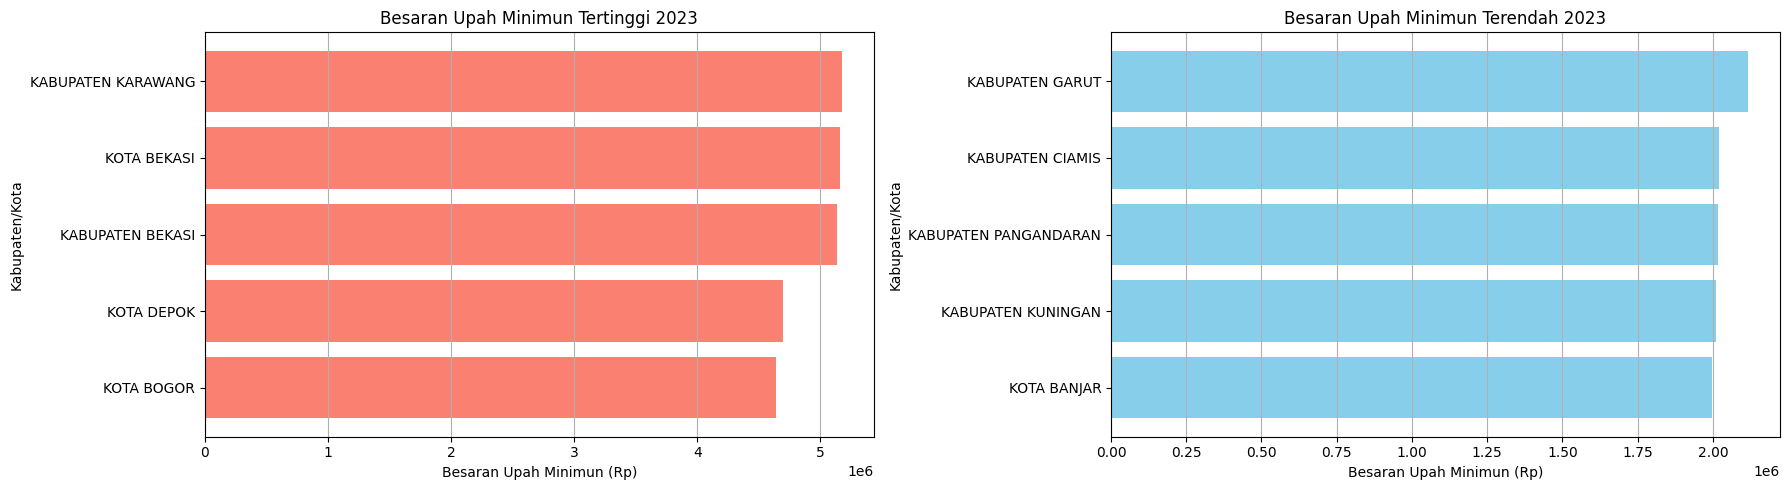

In [198]:
um_2023 = um[um['tahun']==2023].copy()
um_sorted = um_2023.sort_values(by='besaran_upah_minimum', ascending=True)

um_tertinggi = um_sorted[-5:]
um_terendah = um_sorted[:5]

plt.figure(figsize=(18, 5))

# Bar plot untuk um tertinggi
plt.subplot(1, 2, 1)
plt.barh(um_tertinggi['nama_kabupaten_kota'], um_tertinggi['besaran_upah_minimum'], color='salmon')
plt.title('Besaran Upah Minimun Tertinggi 2023')
plt.xlabel('Besaran Upah Minimun (Rp)')
plt.ylabel('Kabupaten/Kota')
plt.grid(True, axis='x')

# Bar plot untuk um terendah
plt.subplot(1, 2, 2)
plt.barh(um_terendah['nama_kabupaten_kota'], um_terendah['besaran_upah_minimum'], color='skyblue')
plt.title('Besaran Upah Minimun Terendah 2023')
plt.xlabel('Besaran Upah Minimun (Rp)')
plt.ylabel('Kabupaten/Kota')
plt.grid(True, axis='x')

plt.tight_layout()
plt.show()

## Kesimpulan
**Kabupaten/Kota di Jawa Barat dengan Upah Minimum 5 tertinggi dan 5 terendah tahun 2023**
* Kabupaten/Kota seperti Kabupaten Karawang, Kota Bekasi, Kabupaten Bekasi, Kota Depok, dan Kota Bogor memiliki Upah Minimum yang lebih tinggi dibandingkan dengan Kabupaten/Kota lainnya.
* Kabupaten/Kota seperti Kabupaten Garut, Kabupaten Ciamis, Kabupaten Pangandaran, Kabupaten Kuningan, dan Kota Banjar memiliki Upah Minimum yang lebih rendah dibandingkan dengan Kabupaten/Kota lainnya.

**Tren rata-rata Upah Minimum Kabupaten/Kota beberapa tahun terakhir**

c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

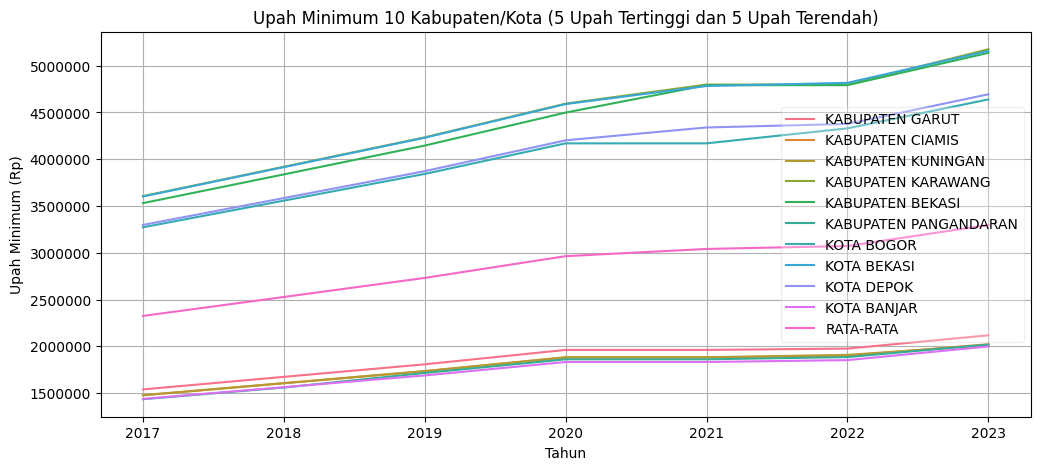

In [212]:
um_sorted = um[um['tahun']==2023].sort_values(by='besaran_upah_minimum', ascending=True).copy()

um_tertinggi = um_sorted[-5:]
um_terendah = um_sorted[:5]
nama_kabupaten_kota = um_tertinggi['nama_kabupaten_kota'].values.tolist() + um_terendah['nama_kabupaten_kota'].values.tolist()

um_filtered = um[um['nama_kabupaten_kota'].isin(nama_kabupaten_kota)]

# variabel bantu untuk menghitung mean tiap tahun
unique_years = um['tahun'].unique()
result_data = []

# hitung mean tiap tahun
for year in unique_years:
    year_data = um[um['tahun'] == year]
    mean_value = year_data['besaran_upah_minimum'].mean()
    
    # buat row baru
    mean_row = {
        'id': 190,  
        'kode_provinsi': 999,  
        'nama_provinsi': "RATA-RATA",  
        'kode_kabupaten_kota': 999,
        'nama_kabupaten_kota': "RATA-RATA",
        'besaran_upah_minimum': mean_value,
        'satuan': 'Rupiah',
        'tahun': year
    }
    result_data.append(mean_row) # masukkan ke list terlebih dahulu
um_rata_rata = pd.DataFrame(result_data,columns=um.columns) # ubah menjadi data frame
um_filtered = pd.concat([um_filtered,um_rata_rata]) #gabungkan data

# line chart um kab/kota 5 tertinggi dan 5 terendah tahun 2023
plt.figure(figsize=(12,5))
sns.lineplot(x="tahun", y="besaran_upah_minimum", data=um_filtered, hue='nama_kabupaten_kota')
plt.title('Upah Minimum 10 Kabupaten/Kota (5 Upah Tertinggi dan 5 Upah Terendah)')
plt.xlabel('Tahun')
plt.ylabel('Upah Minimum (Rp)')

# Mengatur format label tahun
ax = plt.gca()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)  # Menonaktifkan notasi ilmiah
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Format tahun tanpa desimal

plt.legend(loc="center right", framealpha=0.3)
plt.grid(True)
plt.show()

## Kesimpulan
**2. Bagaimana tren rata-rata Upah Minimum Kabupaten/Kota selama beberapa tahun terakhir?**

Upah minimum 10 Kabupaten/Kota selama beberapa tahun cenderung mengalami peningkatan dari tahun ke tahun.

**Korelasi dari keempat atribut**

In [200]:
df3.corr()

,besaran_upah_minimum,jumlah_penduduk_bekerja,jumlah_pengeluaran_per_kapita,garis_kemiskinan_perkapita
besaran_upah_minimum,1.000,0.502,0.611,0.522
jumlah_penduduk_bekerja,0.502,1.000,0.129,0.013
jumlah_pengeluaran_per_kapita,0.611,0.129,1.000,0.769
garis_kemiskinan_perkapita,0.522,0.013,0.769,1.000


**Visualisasi korelasi**

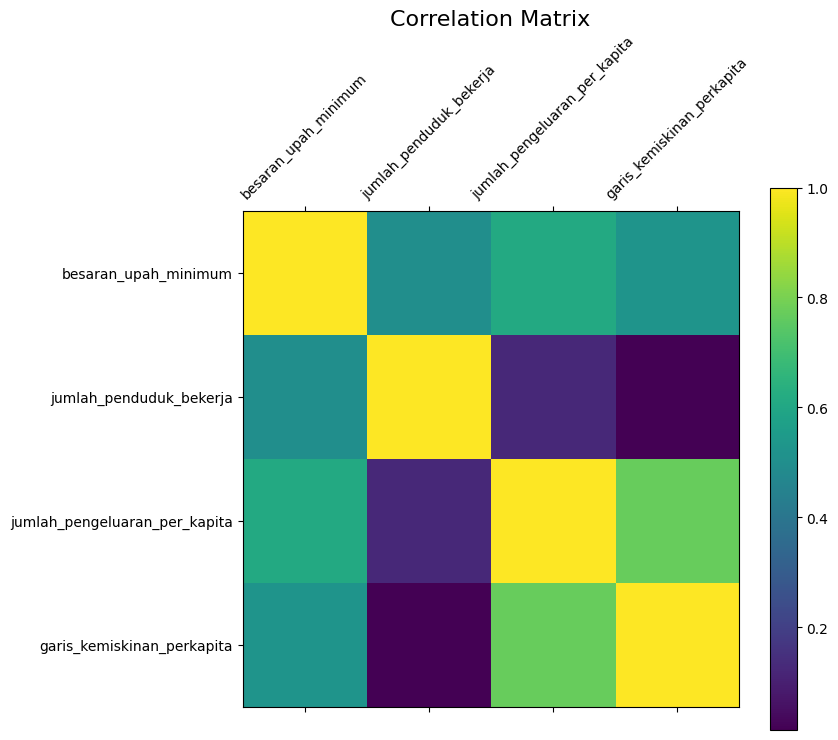

In [201]:
f = plt.figure(figsize=(8, 7))
plt.matshow(df3.corr(), fignum=f.number)
plt.xticks(range(df3.select_dtypes(['number']).shape[1]), df3.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df3.select_dtypes(['number']).shape[1]), df3.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);

## Kesimpulan
**Bagaimana korelasi antara pengeluaran per kapita, upah minimum, jumlah penduduk yang bekerja, dan angka garis kemiskinan per kapita?**

Berdasarkan matriks korelasi di atas, berikut adalah kesimpulan korelasi antara atribut-atribut:

* Besaran Upah Minimum memiliki korelasi positif yang kuat dengan Jumlah Penduduk yang Bekerja sebesar 0.502. Ini mengindikasikan bahwa ketika besaran upah minimum naik, jumlah penduduk yang bekerja juga cenderung meningkat.

* Besaran Upah Minimum memiliki korelasi positif yang kuat dengan Jumlah Pengeluaran Per Kapita sebesar 0.611. Ini menunjukkan bahwa ketika besaran upah minimum meningkat, pengeluaran per kapita cenderung juga meningkat.

* Besaran Upah Minimum memiliki korelasi positif yang kuat dengan Garis Kemiskinan Per Kapita sebesar 0.522. Ini menandakan bahwa ketika besaran upah minimum naik, garis kemiskinan per kapita juga cenderung meningkat.

* Jumlah Penduduk yang Bekerja memiliki korelasi yang relatif rendah dengan Jumlah Pengeluaran Per Kapita (0.129) dan Garis Kemiskinan Per Kapita (0.013). Ini menunjukkan bahwa tidak ada hubungan kuat antara jumlah penduduk yang bekerja dengan pengeluaran per kapita atau garis kemiskinan per kapita.

* Jumlah Pengeluaran Per Kapita memiliki korelasi yang kuat dengan Garis Kemiskinan Per Kapita sebesar 0.769. Ini mengindikasikan bahwa ketika pengeluaran per kapita meningkat, garis kemiskinan per kapita juga cenderung meningkat.

**Boxplot besaran upah minimum kabupaten/kota di Jawa Barat**

c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


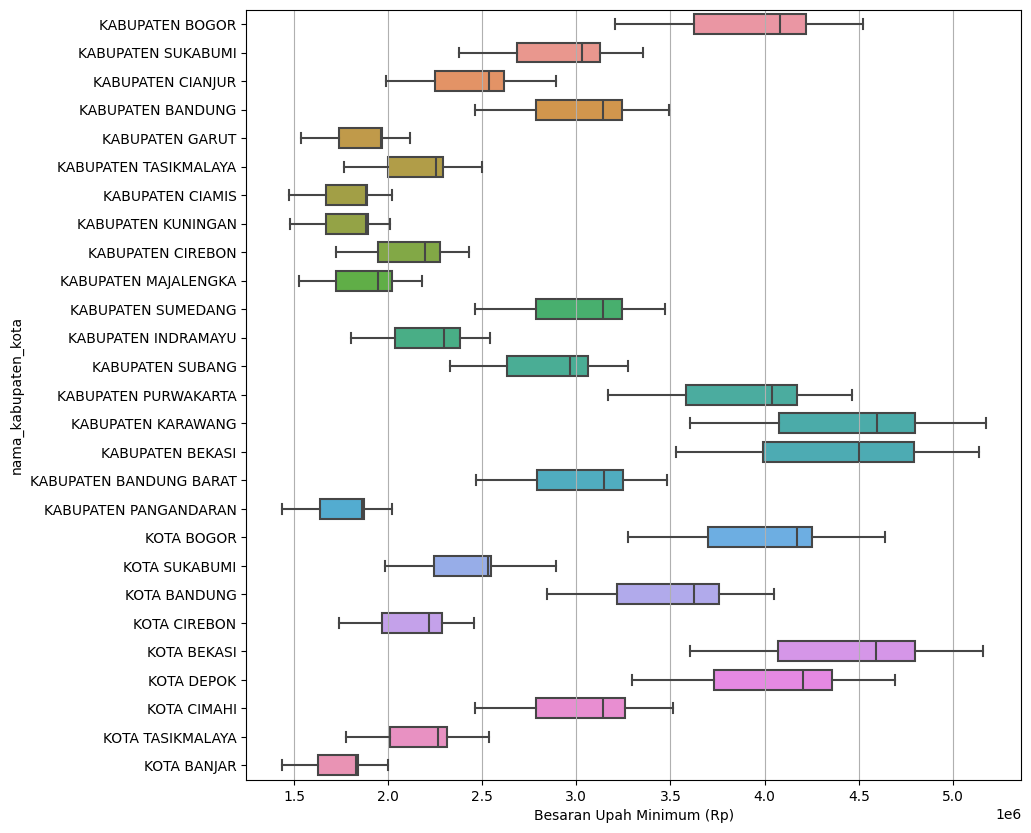

In [202]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.boxplot( x="besaran_upah_minimum", y='nama_kabupaten_kota', data=um, width=0.7)
plt.xlabel('Besaran Upah Minimum (Rp)')
plt.show()

**Boxplot jumlah pengeluaran per kapita kabupaten/kota di Jawa Barat**

c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


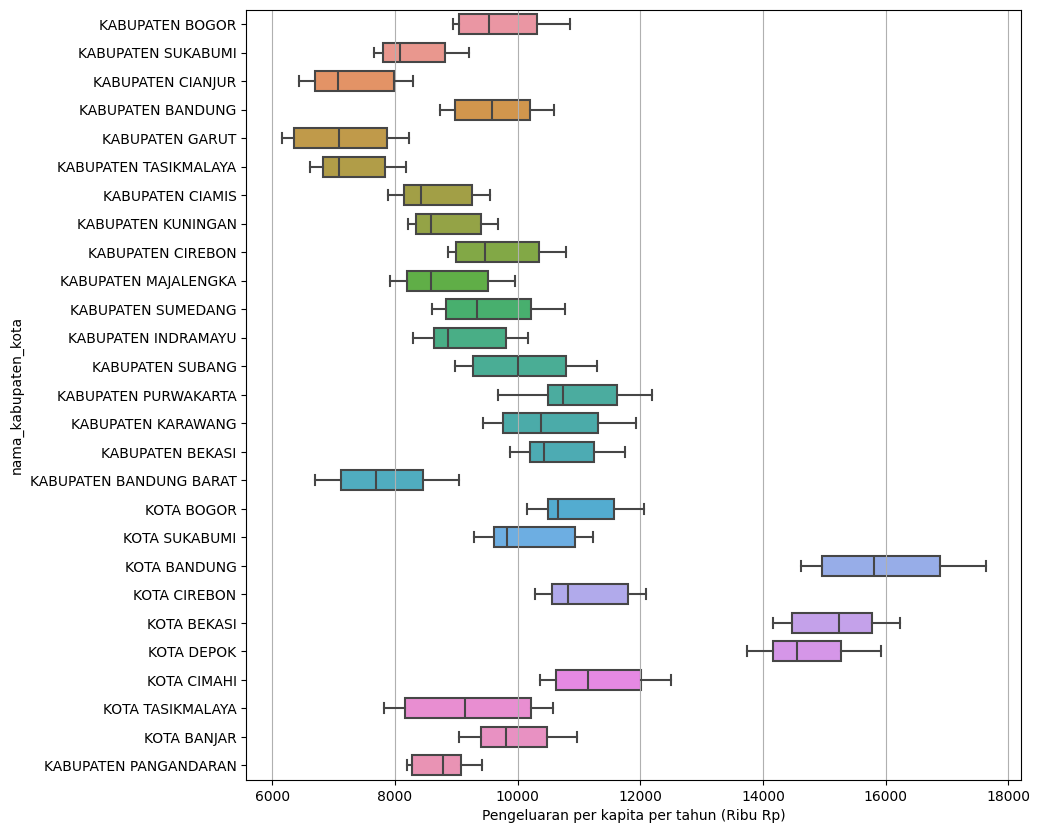

In [203]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.boxplot( x="jumlah_pengeluaran_per_kapita", y='nama_kabupaten_kota', data=ppk, width=0.7)
plt.xlabel('Pengeluaran per kapita per tahun (Ribu Rp)')
plt.show()

**Boxplot garis kemiskinan per kapita kabupaten/kota di Jawa Barat**

c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


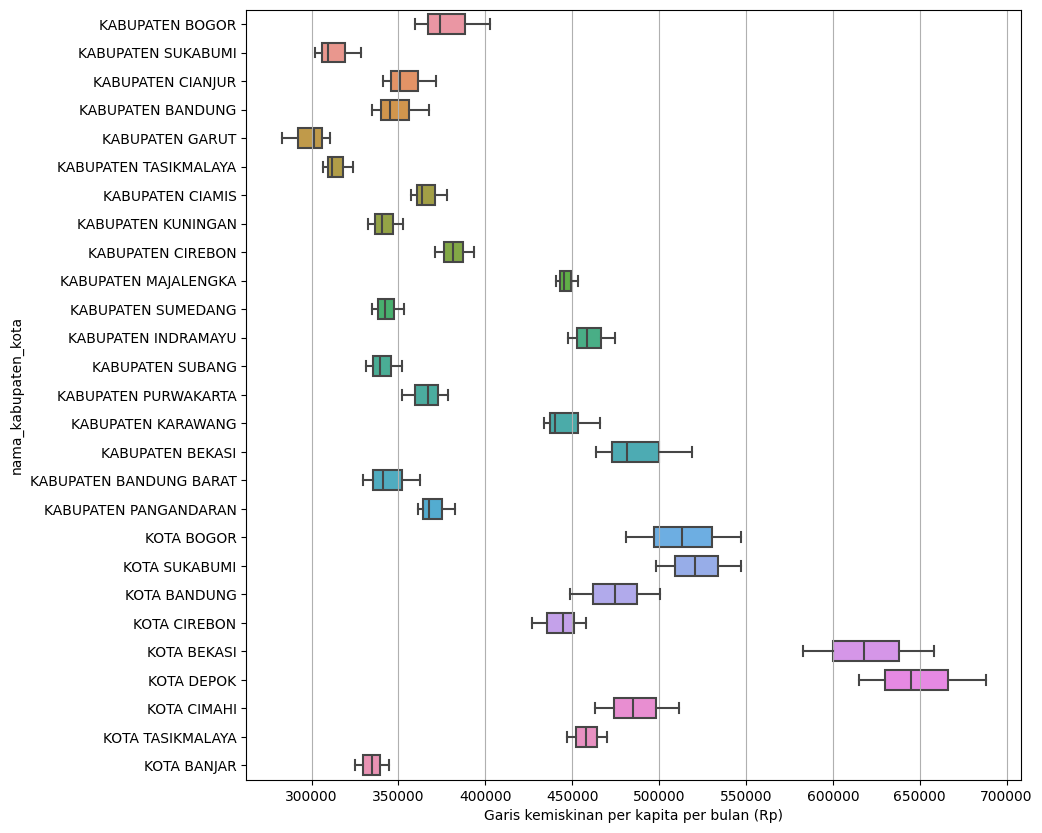

In [204]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.boxplot( x="garis_kemiskinan_perkapita", y='nama_kabupaten_kota', data=gk, width=0.7)
plt.xlabel('Garis kemiskinan per kapita per bulan (Rp)')
plt.show()

**Boxplot jumlah penduduk yang bekerja kabupaten/kota di Jawa Barat**

c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FRQNC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


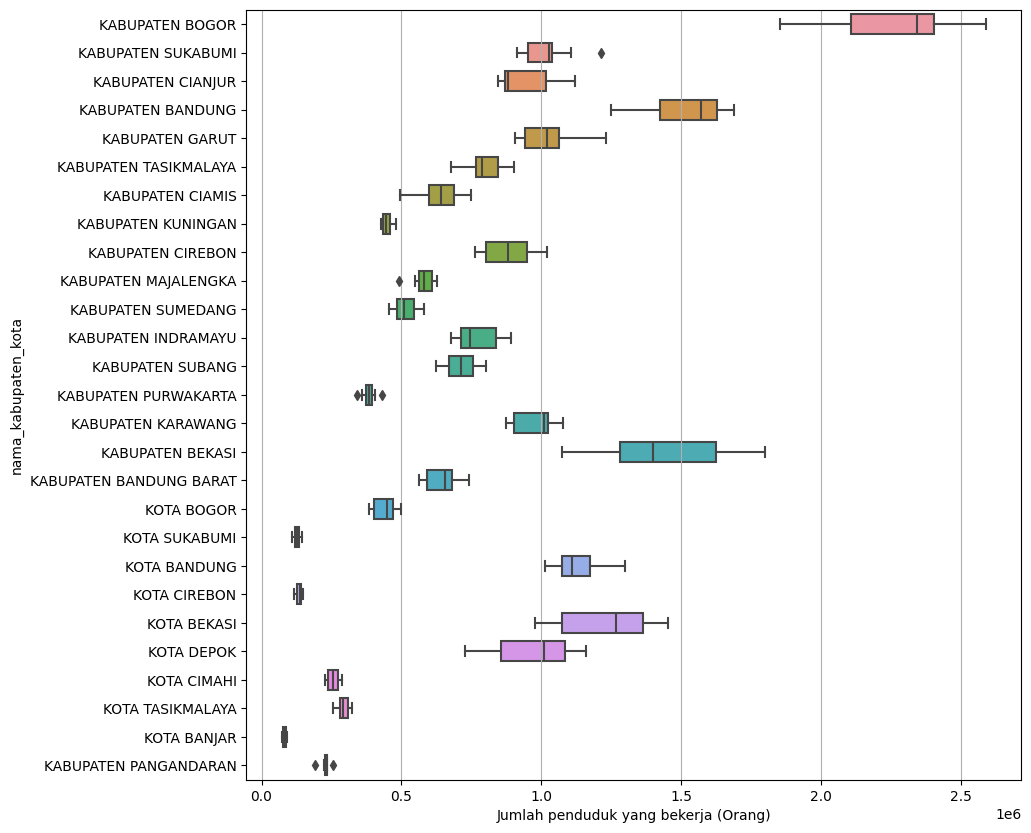

In [205]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.boxplot(x="jumlah_penduduk_bekerja", y='nama_kabupaten_kota', data=jpb, width=0.7)
plt.xlabel('Jumlah penduduk yang bekerja (Orang)')
plt.show()

# Kesimpulan
**1. Kabupaten/Kota di Jawa Barat dengan Upah Minimum 5 tertinggi dan 5 terendah tahun 2023**
* Kabupaten/Kota seperti Kabupaten Karawang, Kota Bekasi, Kabupaten Bekasi, Kota Depok, dan Kota Bogor memiliki Upah Minimum yang lebih tinggi dibandingkan dengan Kabupaten/Kota lainnya.
* Kabupaten/Kota seperti Kabupaten Garut, Kabupaten Ciamis, Kabupaten Pangandaran, Kabupaten Kuningan, dan Kota Banjar memiliki Upah Minimum yang lebih rendah dibandingkan dengan Kabupaten/Kota lainnya.
   

**2. Bagaimana tren rata-rata Upah Minimum Kabupaten/Kota selama beberapa tahun terakhir?**

Upah minimum 10 Kabupaten/Kota selama beberapa tahun cenderung mengalami peningkatan dari tahun ke tahun.


**3.  Bagaimana korelasi antara pengeluaran per kapita, upah minimum, jumlah penduduk yang bekerja, dan angka garis kemiskinan per kapita?**

Berdasarkan matriks korelasi di atas, berikut adalah kesimpulan korelasi antara atribut-atribut:

* Besaran Upah Minimum memiliki korelasi positif yang kuat dengan Jumlah Penduduk yang Bekerja sebesar 0.502. Ini mengindikasikan bahwa ketika besaran upah minimum naik, jumlah penduduk yang bekerja juga cenderung meningkat.

* Besaran Upah Minimum memiliki korelasi positif yang kuat dengan Jumlah Pengeluaran Per Kapita sebesar 0.611. Ini menunjukkan bahwa ketika besaran upah minimum meningkat, pengeluaran per kapita cenderung juga meningkat.

* Besaran Upah Minimum memiliki korelasi positif yang kuat dengan Garis Kemiskinan Per Kapita sebesar 0.522. Ini menandakan bahwa ketika besaran upah minimum naik, garis kemiskinan per kapita juga cenderung meningkat.

* Jumlah Penduduk yang Bekerja memiliki korelasi yang relatif rendah dengan Jumlah Pengeluaran Per Kapita (0.129) dan Garis Kemiskinan Per Kapita (0.013). Ini menunjukkan bahwa tidak ada hubungan kuat antara jumlah penduduk yang bekerja dengan pengeluaran per kapita atau garis kemiskinan per kapita.

* Jumlah Pengeluaran Per Kapita memiliki korelasi yang kuat dengan Garis Kemiskinan Per Kapita sebesar 0.769. Ini mengindikasikan bahwa ketika pengeluaran per kapita meningkat, garis kemiskinan per kapita juga cenderung meningkat.


**4.   Bagaimana persebaran data dari pengeluaran per kapita, upah minimum, jumlah penduduk yang bekerja, dan angka garis kemiskinan per kapita?**

Data persebaran sudah tersedia di atas dalam bentuk boxplot.
